# Demo 3: A general IVP solver

In this jupyter notebook, we will learn how to use the general IVP solver we wrote in `./project1/solver.py`.
Let's start from reproducing the results in `demo1` and `demo2`.


Before we start using the IVP solver, let's import the related packages first.

In [38]:
import importlib
import solver
importlib.reload(solver)

import numpy as np
import matplotlib.pyplot as plt
import solver as mysolver             # your own solver
import solution.solver_sol as solver  # compare your results with solution
from scipy.integrate import solve_ivp as solver_scipy

# Note that if the path of your jupyter notebook is different from the path of the solver.py file, 
# you need to add the relative path of the solver.py file during the import, for example:

#import project1.solver as mysolver
#import project1.solution.solver_sol as solver

# Or, you can add the path of the solver.py file to the system path, for example:
# import sys
# sys.path.append('path_of_solver.py')


Now, let's start to reproduce `demo1` and `demo2`.
Set
* t0 = 0 sec and tmax = 20 sec
* time step dt = 0.01
* The spring constant `K` = 1
* The mass `M` = 1
* Initial condition: `x=1`, `v=0`.

In [39]:
# define the y' function
def derive_func(t,y,K,M):
    f = np.zeros(len(y))
    f[0] = y[1]           # y'[0] = v
    f[1] = -K * y[0]/M        # y'[1] = a = F/M
    return f
# Prepare the input arguments
K = 1
M = 1
t0 = 0
tmax = 20
dt = 0.01
y = [1, 0]  # [x0, v0]
t_eval = np.arange(t0, tmax, dt)
t_span = t_eval

# use the IVP solver
sol = mysolver.solve_ivp(derive_func,t_span,y, "RK2", t_eval, args = (K, M))

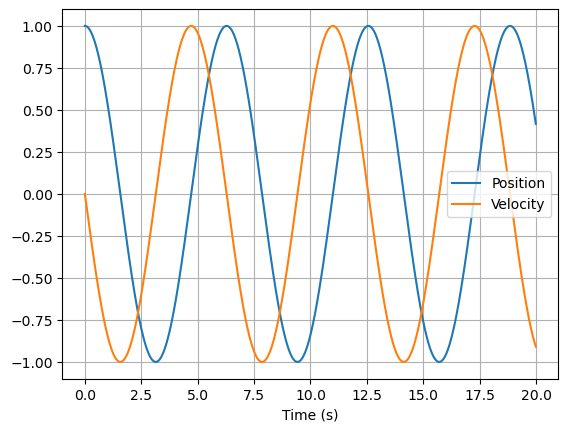

In [40]:
# visualize the results

plt.plot(t_eval, sol[0], label='Position')
plt.plot(t_eval, sol[1], label='Velocity')
plt.xlabel('Time (s)')
plt.legend()
plt.grid(True)
plt.show()

# Damped Oscillation

When there is a damping force ($F_{\rm damp}=-\lambda \dot{x}$), the equation of motion becomes,

$$
m\ddot{x} + \lambda \dot{x} + kx = 0
$$

### Exercise

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a damped oscillator (from t=0 to 20). IC: at t=0, K=M=1, A=1, $\phi= 0$,$\lambda=0.2$.
* Make plots of position(t), velocity(t), and total energy (t). Comapred your results with analytical solutions.

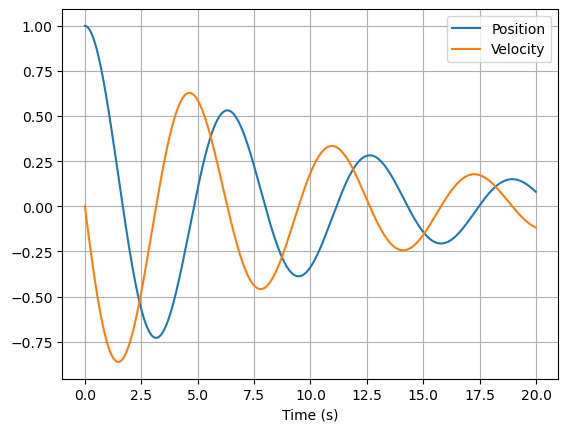

In [41]:
# TODO

# Define the damped oscillator function
def damped_oscillator(t, y, K, M, damping):
    f = np.zeros(len(y))
    f[0] = y[1]                          # dx/dt = velocity
    f[1] = -K/M * y[0] - damping/M * y[1] # dv/dt = -K/M * x - damping/M * v
    return f


# Prepare the input arguments
K = 1
M = 1
damping = 0.2  # Damping coefficient
t0 = 0
tmax = 20
dt = 0.01
y = [1, 0]  # [x0, v0] -0.5*L/M
t_eval = np.arange(t0, tmax, dt)
t_span = t_eval

# use the IVP solver
sol = mysolver.solve_ivp(damped_oscillator, t_span, y, "RK4", t_eval, args = (K, M, damping))
# visualize the results
plt.plot(t_eval, sol[0], label='Position')
plt.plot(t_eval, sol[1], label='Velocity')
plt.xlabel('Time (s)')
plt.legend()
plt.grid(True)
plt.show()

### Analytical Solutions

The analytical solution is

$$
x(t) = A e^{-\gamma t} \left[\cos(\omega t + \phi) \right],
$$

where $\omega = \sqrt{\gamma^2 -\omega_0^2}$ or $\omega=\sqrt{\omega_0^2-\gamma^2}$.

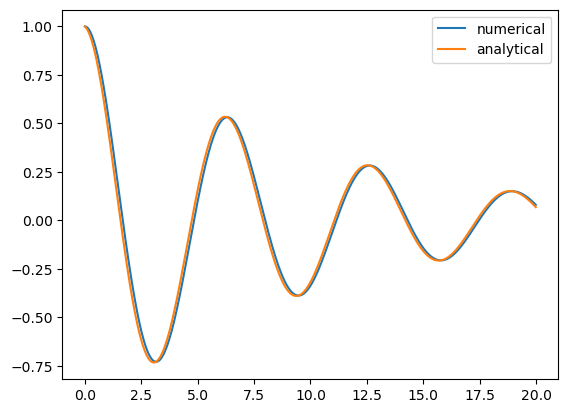

In [42]:
# Compute the analytical solution


gamma = damping/(2*M)   # Damping coefficient (lambda/2M)
phi = 0       # Phase
omega_0 = np.sqrt(K/M)   # Natural frequency
omega = np.sqrt(omega_0**2 - gamma**2)  # Damped frequency

analytical_sol = np.exp(-gamma*t_eval) * (np.cos(omega*t_eval + phi))

plt.plot(t_eval, sol[0], label="numerical")
plt.plot(t_eval, analytical_sol, label="analytical")
plt.legend()
plt.show()

## Part 2

Now, let's explore the evolution of the three general cases:

* Underdamping: $\omega_0^2 > \gamma^2$
* Critical damping: $\omega_0^2 = \gamma^2$
* Overdamping: $\omega_0^2 < \gamma^2$

Vary $\lambda$, to the corresponding conditions:
* $\lambda = 0.2$ ($\omega_0^2 > \gamma^2$)
* $\lambda = 2$ ($\omega_0^2 = \gamma^2$)
* $\lambda = 2.4$ ($\omega_0^2 < \gamma^2$)

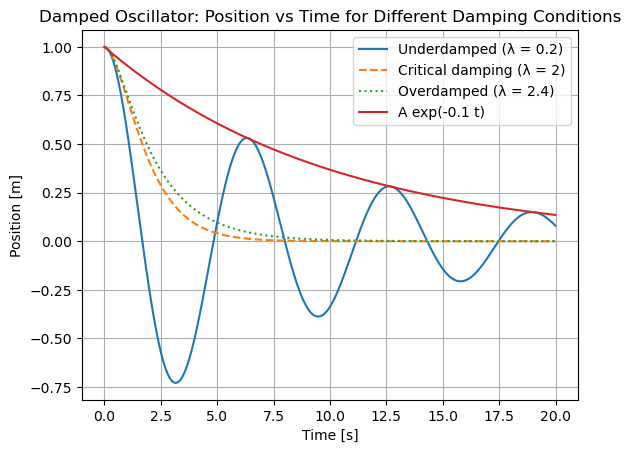

In [43]:
# TODO

# Helper function to run simulation for different damping values
def run_simulation(gamma, label, linestyle='-'):
    # Solve the IVP problem for the damped oscillator
    sol = mysolver.solve_ivp(damped_oscillator, t_eval, y, "RK4", t_eval, args=(K, M, gamma))
    # Plot the position vs time
    plt.plot(t_eval, sol[0], label=label, linestyle=linestyle)

# Underdamping case (lambda = 0.2, omega_0^2 > gamma^2)
gamma_underdamped = 0.2  
run_simulation(gamma_underdamped, 'Underdamped (λ = 0.2)')

# Critical damping case (lambda = 2, omega_0^2 = gamma^2)
gamma_critical = 2  
run_simulation(gamma_critical, 'Critical damping (λ = 2)', linestyle='--')

# Overdamping case (lambda = 2.4, omega_0^2 < gamma^2)
gamma_overdamped = 2.4  
run_simulation(gamma_overdamped, 'Overdamped (λ = 2.4)', linestyle=':')

# Plot settings
plt.plot(t_eval, np.exp(-0.1*t_eval), label="A exp(-0.1 t)")
plt.title('Damped Oscillator: Position vs Time for Different Damping Conditions')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.legend()
plt.grid(True)
plt.show()






# Forced Oscillation

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a forced oscillator (from t=0 to 100).
* Set the inital conditions: A=1, K=M=1, $\lambda=0.2$, $F_0=0.1$ and $\omega_f=0.8$.
* Make plots of position(t), velocity(t), and total energy(t).

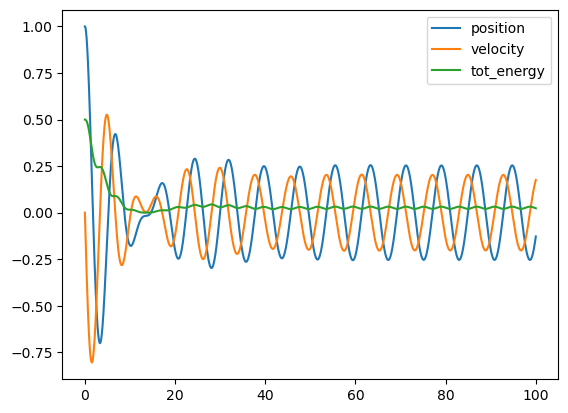

In [44]:
# TODO

F0 = 0.1      # Amplitude of the external force
omega_f = 0.8 # Forcing frequency
# Modified function with forcing term
def func(t, y, K, M, damping, F0, omega_f):
    f = np.zeros(len(y))
    f[0] = y[1]  # dx/dt = v
    f[1] = -K/M * y[0] - damping/M * y[1] + F0/M * np.cos(omega_f * t)  # dv/dt = -K/M * x - damping term + forcing term
    return f

t_eval = np.arange(0, 100, 0.005)
damping = 0.2
sol = mysolver.solve_ivp(func, t_eval, y, "RK4", t_eval, args=(K, M, damping, F0, omega_f))

def total_energy(x, v, K, M):
    kinetic_energy = 0.5 * M * v**2
    potential_energy = 0.5 * K * x**2
    return kinetic_energy + potential_energy

energy = total_energy(sol[0], sol[1], K, M)
plt.plot(t_eval, sol[0], label="position")
plt.plot(t_eval, sol[1], label="velocity")
plt.plot(t_eval, energy, label="tot_energy")
plt.legend()
plt.show()


# Resonance

* Resonance will happen when $\omega_0 = \omega_f$ without damping.
* Modify your `demo3` but set $\lambda=0$ and $\omega_f=1$.
* Re-run your simulation with $\lambda=0.1$ and $0.01$.


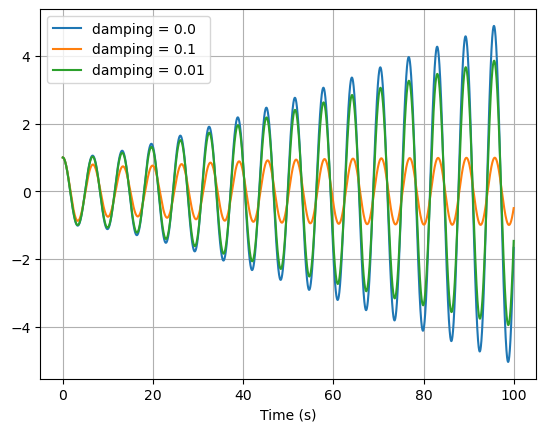

In [48]:
# TODO
# parameters
t_span = np.arange(0,100, 0.005)
t_eval = t_span
y = [1,0] # initial condition
K = 1
M = 1
dampomg = 0.0
F0 =0.1
omega_f = 1.0
args = (K,M,damping,F0,omega_f)

# use IVP solver to solve the problem
sol1 = mysolver.solve_ivp(func,t_span,y, "RK4", t_eval, args=(K,M,0.0,F0,omega_f))
sol2 = mysolver.solve_ivp(func,t_span,y, "RK4", t_eval, args=(K,M,0.1,F0,omega_f))
sol3 = mysolver.solve_ivp(func,t_span,y, "RK4", t_eval, args=(K,M,0.01,F0,omega_f))

# visualize the results
plt.plot(t_eval, sol1[0], label='damping = 0.0')
plt.plot(t_eval, sol2[0], label='damping = 0.1')
plt.plot(t_eval, sol3[0], label='damping = 0.01')
plt.xlabel('Time (s)')
plt.legend()
plt.grid(True)
plt.show()

# Using `scipy`

Compare the results of our solver (`mysolver`) with the `solve_ivp` in `scipy`.

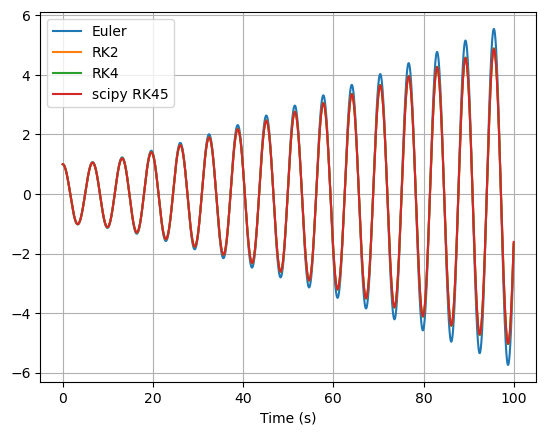

In [46]:
# TODO

sol_euler = mysolver.solve_ivp(func,t_span,y, "Euler", t_eval, args=(K,M,0.0,F0,omega_f))
sol_rk2 = mysolver.solve_ivp(func,t_span,y, "RK2", t_eval, args=(K,M,0.0,F0,omega_f))
sol_rk4 = mysolver.solve_ivp(func,t_span,y, "RK4", t_eval, args=(K,M,0.0,F0,omega_f))
sol_scipy = solver_scipy(func, [0,100], y, args=(K,M,0.0,F0,omega_f), t_eval=t_eval, method='RK45')

# visualize the results
plt.plot(t_eval, sol_euler[0], label="Euler")
plt.plot(t_eval, sol_rk2[0], label="RK2")
plt.plot(t_eval, sol_rk4[0], label="RK4")
plt.plot(sol_scipy.t, sol_scipy.y[0], label="scipy RK45")
plt.xlabel('Time (s)')
plt.grid(True)
plt.legend()
plt.show()


# Performance

We could mesure the performance of our solver and compare it with scipy.

In [47]:
#TODO

%timeit mysolver.solve_ivp(func,t_span,y, "RK4", t_eval, args=(K,M,0.0,F0,omega_f))
%timeit mysolver.solve_ivp(func,t_span,y, "RK2", t_eval, args=(K,M,0.0,F0,omega_f))
%timeit mysolver.solve_ivp(func,t_span,y, "Euler", t_eval, args=(K,M,0.0,F0,omega_f))
%timeit solver_scipy(func, [0,100], y, args=(K,M,0.0,F0,omega_f), t_eval=t_eval, method='RK45')


324 ms ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
150 ms ± 4.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
69.1 ms ± 2.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.6 ms ± 536 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Which one is faster?

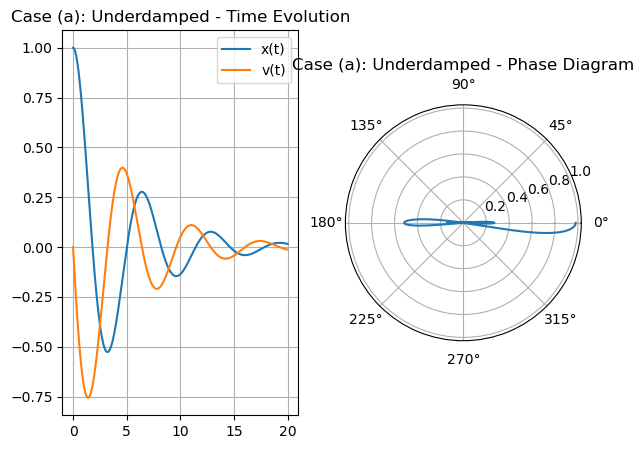

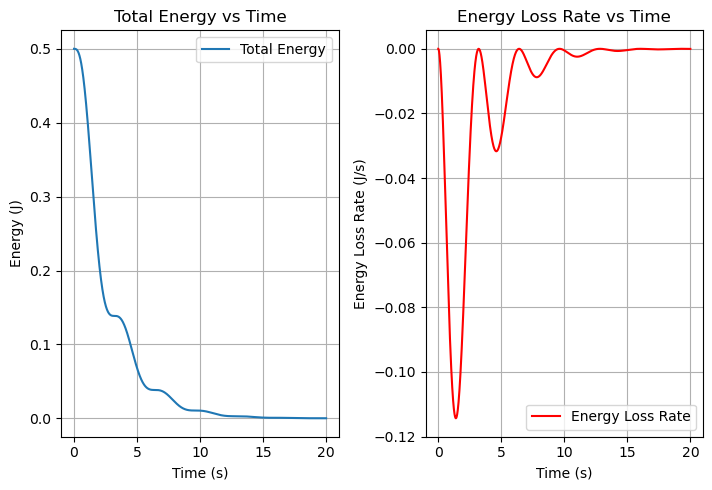

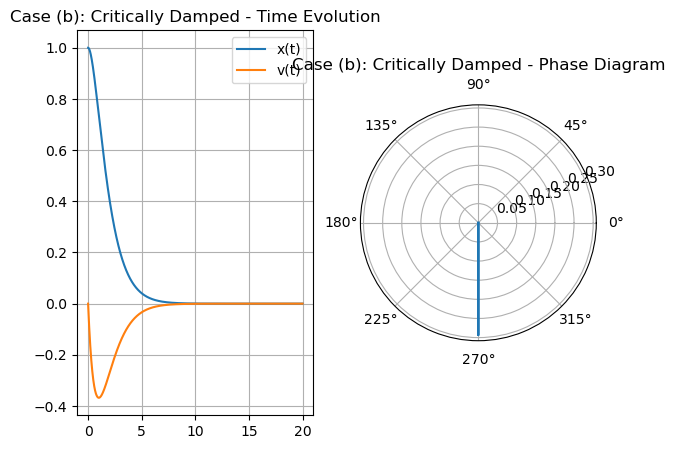

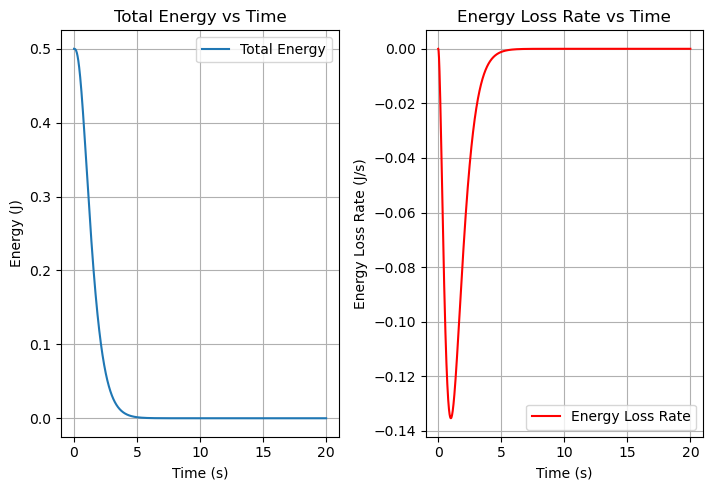

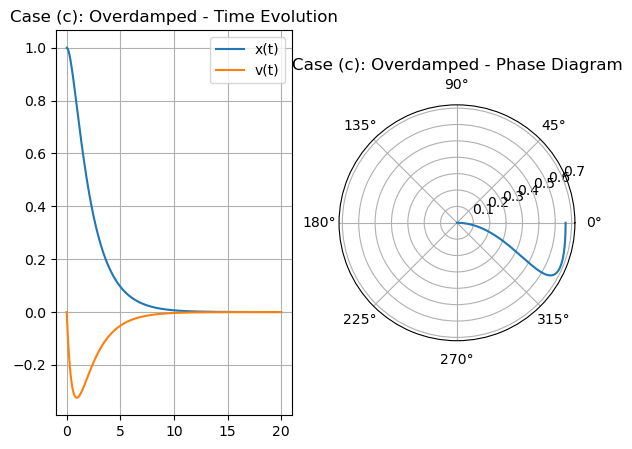

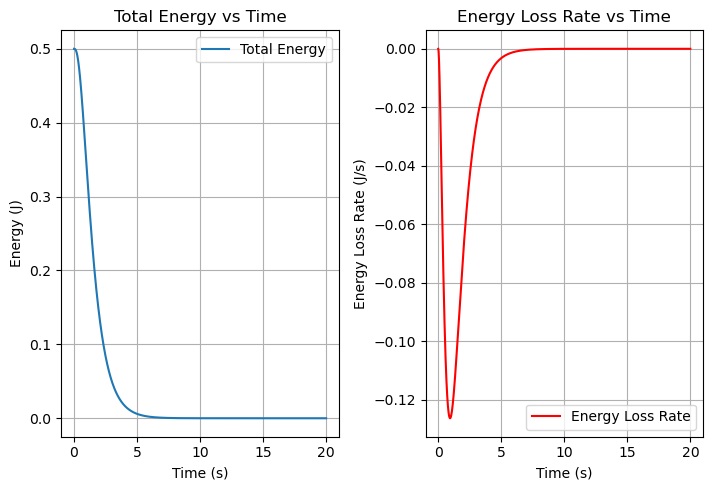

In [55]:
# Define the damped oscillator differential equation
def damped_oscillator(t, y, omega0, gamma):
    f = np.zeros(2)
    f[0] = y[1]
    f[1] = -2 * gamma * y[1] - omega0**2 * y[0]
    return f

# Function to calculate total energy and energy loss rate
def calculate_energy(x, v, M, K, gamma):
    E = 0.5 * M * v**2 + 0.5 * K * x**2
    dE_dt = -gamma * v**2
    return E, dE_dt

# Function to simulate and plot results
def simulate_and_plot(A, omega0, gamma, phi, label):
    # Initial conditions
    x0 = A * np.cos(phi)
    v0 = -A * omega0 * np.sin(phi)
    y0 = [x0, v0]
    
    # Time parameters
    t0, tmax, dt = 0, 20, 0.01
    t_eval = np.arange(t0, tmax, dt)
    
    # Solve using the custom IVP solver
    sol = mysolver.solve_ivp(damped_oscillator, t_eval, y0, "RK4", t_eval, args=(omega0, gamma))

    # Extract position (x) and velocity (v)
    x = sol[0, :]
    v = sol[1, :]
    
    # Calculate energy and energy loss rate
    E, dE_dt = calculate_energy(x, v, M, K, gamma)

    # Calculate u and w
    omega1 = np.sqrt(np.abs(omega0**2 - gamma**2))
    u = omega1 * x
    w = gamma * v * x

    # Plot x(t) and v(t)
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 4, 1)
    plt.plot(t_eval, x, label='x(t)')
    plt.plot(t_eval, v, label='v(t)')
    plt.title(f'{label} - Time Evolution')
    plt.legend()
    plt.grid()

    # Plot phase diagram in polar coordinates
    plt.subplot(1, 4, 2, polar=True)
    r = np.sqrt(u**2 + w**2)
    theta = np.arctan2(w, u)
    plt.plot(theta, r)
    plt.title(f'{label} - Phase Diagram')

    # Plot total energy versus time
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 4, 3)
    plt.plot(t_eval, E, label='Total Energy')
    plt.title('Total Energy vs Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy (J)')
    plt.legend()
    plt.grid()

    # Plot energy loss rate versus time
    plt.subplot(1, 4, 4)
    plt.plot(t_eval, dE_dt, label='Energy Loss Rate', color='red')
    plt.title('Energy Loss Rate vs Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy Loss Rate (J/s)')
    plt.legend()
    plt.grid()


    plt.tight_layout()
    plt.show()

# Simulate and plot for the three cases
simulate_and_plot(A=1, omega0=1, gamma=0.2, phi=0, label='Case (a): Underdamped')
simulate_and_plot(A=1, omega0=1, gamma=1.0, phi=0, label='Case (b): Critically Damped')
simulate_and_plot(A=1, omega0=1, gamma=1.2, phi=0, label='Case (c): Overdamped')